<a href="https://colab.research.google.com/github/eduardoscovino/Airbnb-data-analysis-sicilia/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Sicília*
*by Eduardo Scovino*

---


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

# Sobre a Sicília

<img alt="Sicily" width="60%" src="https://images.unsplash.com/photo-1523365154888-8a758819b722?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1469&q=80">

A Sicília é, certamente, um lugar que merece ser incluído no seu roteiro de viagem à Itália. Não existe um motivo, mas sim vários.

Para quem gosta de praias, a Sicília é banhada por três mares: Tirreno, Mediterrâneo e Jônico. Possui praias listadas entre as mais bonitas do mundo, e opções não faltam nos quase 1500 km de praia na ilha.

Possui uma história muito rica, pois já passarem pela ilha colonizadores de várias das mais importantes civilizações da humanidade, como gregos, romanos, fenícios, bizantinos, árabes, dentre outros. O que nos leva a imaginar que há vários monumentos históricos e ruínas desses povos, sendo alguns deles patrimônios da humanidade.

Para quem gosta de gastronomia, a cozinha siciliana é uma das melhores da Itália, muito em detrimento da variedade vinda das diversas influências que passaram pela região.

Com tudo isso, é de se imaginar que o turismo seja bem forte na Sicília. Assim, opções de airbnb não devem faltar por lá...

Para conhecer mais sobre a Sicília, recomendo este [blog](https://descobrindoasicilia.com/10-motivos-para-incluir-a-sicilia-na-sua-viagem-a-italia/).

**Neste *notebook*, iremos analisar os dados das aloções do airbnb para a Sicília, na Itália, e ver quais insights podem ser extraídos na busca pela opção ideal.**

# A análise

A análise será dividida nas seguintes etapas:

`1) Data discovery:` Importação das bibliotecas que serão utilizadas, leitura do dataset, dicionarização das variáveis e identificação das tipagens;

`2) Verificação de dados nulos:` Checagem de valores nulos e avaliação se alguma coluna pode ser excluída do dataset devido à pouca relevância;

`3) Tratamento de outliers:` Verificação de outliers e posterior limpeza do dataset para uma análise mais assertiva;

`4) Correlação:` Matriz para identificar variáveis com forte correlação;

`5) Preços dos imóveis:` Foco nos insights relacionados com a variável `price`;

`6) Busca pela estadia ideal:` Determinação das melhores opções nos maiores centros da ilha;

`7) Conclusão`

# 1) Data Discovery

## Importação das bibliotecas e leitura do dataset


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('http://data.insideairbnb.com/italy/sicilia/sicily/2021-12-28/visualisations/listings.csv')

## Dicionário das variáveis e primeiras 5 linhas da tabela

* `id`: id único da alocação
* `name`: nome da alocação
* `host_id`: id único do host
* `host_name`: nome do host
* `neighbourhood_group`: contém apenas valores nulos
* `neighbourhood`: bairro da alocação
* `latitude`: latitude da alocação
* `longitude`: longitude da alocação
* `room_type`: tipo de alocação (quarto privado, apto inteiro, quarto compartilhado, etc.)
* `price`: preço da alocação (moeda não especificada)
* `minimum_nights`: mínimo de noites para efetuar a reserva
* `number of reviews`: número de avaliações da alocação
* `last_review`: data da última avaliação
* `reviews_per_month`: média de avaliações por mês
* `calculated_host_listings_count`: quantidade de alocações do host
* `availability_365`: número de dias em que a alocação está disponível no ano
* `number_of_reviews_ltm`: número de avaliações nos últimos 12 meses
* `license`: licença da alocação

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7011,SEASIDE - Historic Antique Residence,16888,Salinara Yu&Ad,NaN,Marsala,37.84047,12.47778,Entire home/apt,200,3,31,2021-09-29,0.21,9,167,3,NaN
1,15371,Summer Holidays @ VILLA ROSA,58333,Gianluca,NaN,Petrosino,37.70821,12.51400,Entire home/apt,35,1,6,2016-08-26,0.07,1,364,0,NaN
2,22948,B&B NEAR STATION ROOM WITH BALCONY,88837,Giuseppe,NaN,Agrigento,37.30885,13.58582,Private room,29,1,298,2021-11-29,2.37,3,347,35,NaN
3,28379,Apartment in Taormina - Rinaldo,121867,Francesca,NaN,Taormina,37.85172,15.28420,Entire home/apt,74,2,272,2021-11-04,1.96,5,303,18,NaN
4,35264,Etna-sea a panoramic villa,151644,Serena,NaN,Piedimonte Etneo,37.82464,15.15739,Entire home/apt,164,2,144,2021-09-10,1.03,4,360,2,NaN


## Tamanho do dataset e tipagem das variáveis

In [ ]:
print('O dataset possui: ')
print('{} entradas'.format(df.shape[0]))
print('{} variáveis'.format(df.shape[1]))
print('\n')
print('Abaixo estão listados os tipos de cada variável:')
print(df.dtypes)

O dataset possui: 
48066 entradas
18 variáveis


Abaixo estão listados os tipos de cada variável:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


# 2)Verificação de dados nulos

## Qual é a porcentagem de valores ausentes no dataset?

In [ ]:
print(df.isnull().sum().sort_values(ascending=False) / df.shape[0])
print('\n')
print('Conclusão: neighbourhood_group e license serão descartadas na análise, pois pela quantidade de valores nulo no dataset, nada acrescentam nos insights')


# removendo neighbourhood_group e license, que são irrelevantes na análise
df.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

neighbourhood_group               1.000000
license                           0.982025
reviews_per_month                 0.305934
last_review                       0.305934
host_name                         0.001227
name                              0.000062
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64


Conclusão: neighbourhood_group e license serão descartadas na análise, pois pela quantidade de valores nulo no dataset, nada acrescentam nos insights


# 3) Tratamento de outliers

## Vamos fazer uma abordagem preliminar de dados estatísticos básicos das variáveis numéricas

Vimos anteriormente quais são as variáveis com tipagem de número. Vamos apenas excluir id e host_id, pois não faz sentido analisá-las agora.

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,48066.000000,48066.000000,48066.000000,33361.000000,48066.000000,48066.000000,48066.000000
mean,123.570903,3.140973,13.536367,0.510483,9.301793,251.685973,2.586506
std,545.896977,8.708326,32.696828,0.746587,28.459930,125.780672,5.728379
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,50.000000,1.000000,0.000000,0.100000,1.000000,177.000000,0.000000
50%,70.000000,2.000000,2.000000,0.240000,2.000000,303.000000,0.000000
75%,100.000000,3.000000,11.000000,0.590000,5.000000,363.000000,3.000000
max,21633.000000,999.000000,631.000000,11.130000,235.000000,365.000000,119.000000


Já há uma pista de outliers ao olharmos para os valores máximos das variáveis, que está muito acima das médias e medianas. A exceção parece ser a variável `availability_365`.

Vamos analisar agora visualmente:

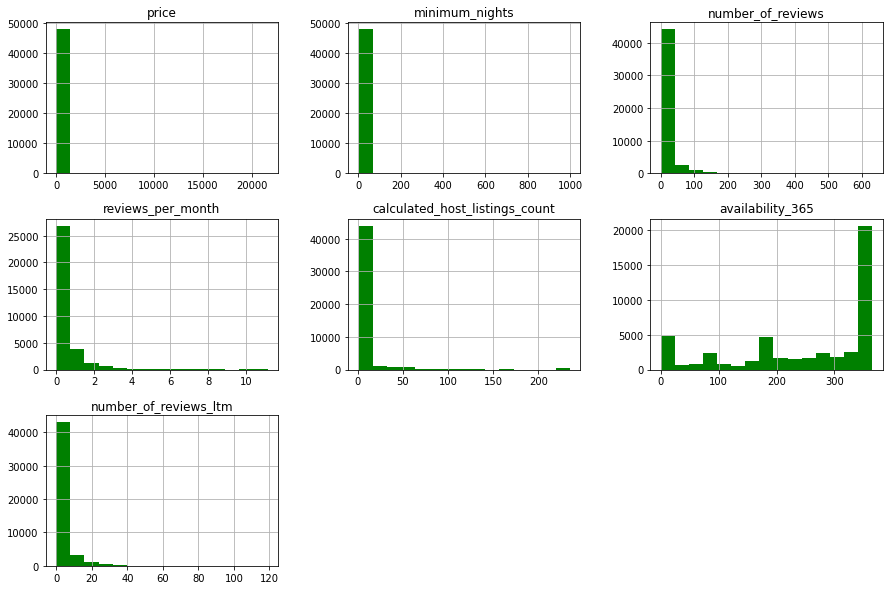

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].hist(bins = 15, figsize =(15, 10), color='green');

Fica evidente a presença de outliers no dataset e precisaremos tratá-lo.

Por exemplo, na variável `price`, podemos estimar pelo gráfico acima que o preço fica abaixo dos 1000 euros. Mas, por se tratar de preço de uma diária,ainda é muito impreciso e não nos dá muitos insghts.

Também vale ressaltar, ainda para a variável `price`, que o valor máximo do dataset é de 21.633 euros, o que é muito improvável. Para conhecermos melhor o perfil de preços da Sicília, teremos que descartar esse tipo de valor discrepante.

## Identificando os outliers nas variáveis

A seguir, foi desenvolvida uma função para identificar a presença de outliers nas colunas numéricas do nosso dataframe. Segue a fórmula:

IQR = Q3 - Q1

Limite inferior = média - IQR * 1,5

Limite superior = média + IQR * 1,5


Onde:

IQR: Amplitude interquartil

Q1: Primeiro Quartil

Q3: Terceiro Quartil

Para auxiliar na visulização, há um gráfico para cada variável que mostra a localização dos outliers

Fonte:

https://aprendendogestao.com.br/2016/08/26/identificacao-de-outliers/


In [ ]:
# função para determinar a presença de outliers no dataframe

def calc_outlier(q3, q1, media, max, min):
  iqr = q3 - q1
  lsup = media + iqr*1.5
  linf = media - iqr*1.5
  if max > lsup and min < linf:
    return 'Outlier máx e mín'
  elif  max > lsup and min > linf:
    return 'Outlier máx'
  elif max < lsup and min < linf:
    return 'Outlier mín'
  else:
    return 'Sem outlier'

# funções para determinar limites sup e inf para limpeza de outliers no dataset

def calc_lim_sup(q3, q1, media):
  iqr = q3 - q1
  lsup = media + iqr*1.5
  return lsup

def calc_lim_inf(q3, q1, media):
  iqr = q3 - q1
  linf = media - iqr*1.5
  return linf

#### Price

O valor mínimo de price é 0. É muito improvável que haja uma alocação gratuita.
O valor máximo de price é 21633. Isso chama a atenção, pois é muito maior que Q3, que é 100.00


Cálculo para achar outlier:
Outlier máx e mín




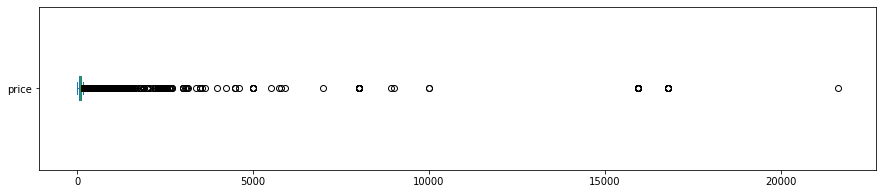

In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))

print('O valor mínimo de price é %s. É muito improvável que haja uma alocação gratuita.' % min(df.price))
print('O valor máximo de price é %s. Isso chama a atenção, pois é muito maior que Q3, que é 100.00' % max(df.price))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.price.quantile(0.75), df.price.quantile(0.25), df.price.mean(), df.price.max(), df.price.min()))
print('\n')

#### Minimum_nights

O valor mínimo de noites é 1. Parece razoável alugar um airbnb por apenas uma noite.
O valor máximo de noites é 999. Está estranho, pois seriam quase 3 anos de estadia


Cálculo para achar outlier:
Outlier máx




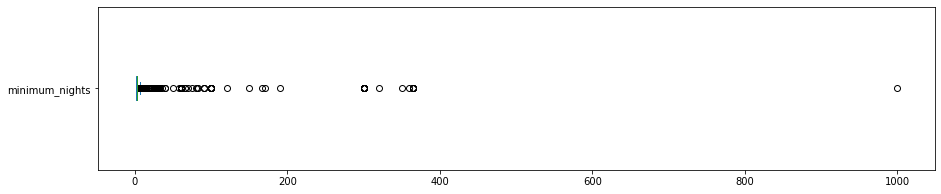

In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))

print('O valor mínimo de noites é %s. Parece razoável alugar um airbnb por apenas uma noite.' % min(df.minimum_nights))
print('O valor máximo de noites é %s. Está estranho, pois seriam quase 3 anos de estadia' % max(df.minimum_nights))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.minimum_nights.quantile(0.75), df.minimum_nights.quantile(0.25), df.minimum_nights.mean(), df.minimum_nights.max(), df.minimum_nights.min()))
print('\n')

#### Number_of_reviews

ATENÇÃO: Para o número de reviews, seria interessante que o dataset tivesse a informação da data de início de alocações no airbnb.

O número mínimo de reviews é 0.
O número máximo de reviews é 631. Está estranho, pois seriam quase 3 anos de estadia


Cálculo para achar outlier:
Outlier máx

Como 0 não foi considerado um outlier no limite inferior, acreditamos que no dataset constem muitas alocações novas na plataforma do airbnb. Logo, ainda não foi possível o acúmulo de reviews, mas é apenas uma hipótese.




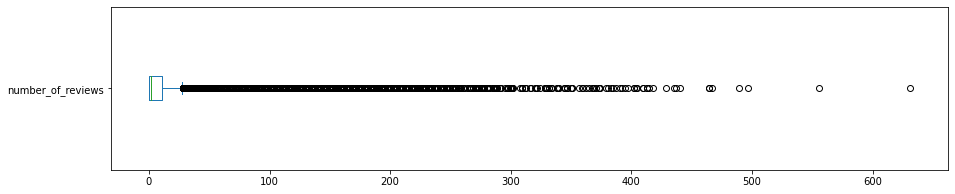

In [ ]:
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))

print('ATENÇÃO: Para o número de reviews, seria interessante que o dataset tivesse a informação da data de início de alocações no airbnb.\n')
print('O número mínimo de reviews é %s.' % min(df.number_of_reviews))
print('O número máximo de reviews é %s. Está estranho, pois seriam quase 3 anos de estadia' % max(df.number_of_reviews))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.number_of_reviews.quantile(0.75), df.number_of_reviews.quantile(0.25), df.number_of_reviews.mean(), df.number_of_reviews.max(), df.number_of_reviews.min()))
print('\nComo 0 não foi considerado um outlier no limite inferior, acreditamos que no dataset constem muitas alocações novas na plataforma do airbnb. Logo, ainda não foi possível o acúmulo de reviews, mas é apenas uma hipótese.')
print('\n')

#### Reviews_per_month

O número mínimo de reviews por mês é 0.01.
O número máximo de reviews por mês é 11.13.


Cálculo para achar outlier:
Outlier máx




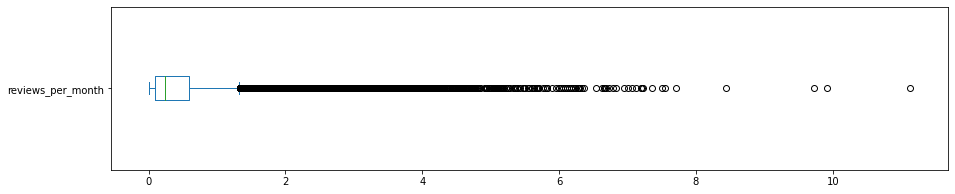

In [ ]:
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3))

print('O número mínimo de reviews por mês é %s.' % min(df.reviews_per_month))
print('O número máximo de reviews por mês é %s.' % max(df.reviews_per_month))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.reviews_per_month.quantile(0.75), df.reviews_per_month.quantile(0.25), df.reviews_per_month.mean(), df.reviews_per_month.max(), df.reviews_per_month.min()))
print('\n')

#### Calculated_host_listings_count

O número mínimo de alocações do host é 1.
O número máximo de alocações do host é 235. É bem improvável que um mês host tenha tantas alocações assim no airbnb


Cálculo para achar outlier:
Outlier máx e mín

Chama atenção o 1 ter ficado como outlier. A média de alocações por host é de 9.3




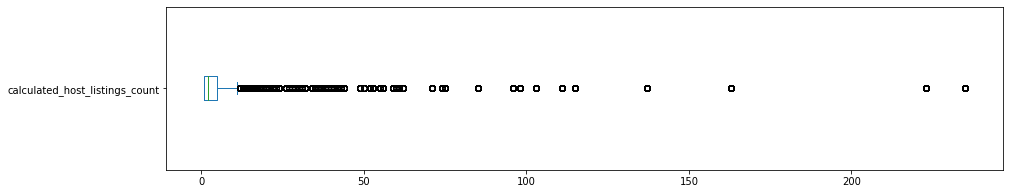

In [ ]:
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))

print('O número mínimo de alocações do host é %s.' % min(df.calculated_host_listings_count))
print('O número máximo de alocações do host é %s. É bem improvável que um mês host tenha tantas alocações assim no airbnb' % max(df.calculated_host_listings_count))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.calculated_host_listings_count.quantile(0.75), df.calculated_host_listings_count.quantile(0.25), df.calculated_host_listings_count.mean(), df.calculated_host_listings_count.max(), df.calculated_host_listings_count.min()))
print('\nChama atenção o 1 ter ficado como outlier. A média de alocações por host é de %s' % round(df.calculated_host_listings_count.mean(), 2))
print('\n')

#### Availability_365

O número mínimo de dias disponíveis da alocação é 0.
O número máximo de dias disponíveis da alocação é 365.


Cálculo para achar outlier:
Sem outlier
Não há outlier para dias disponíveis da alocação no ano




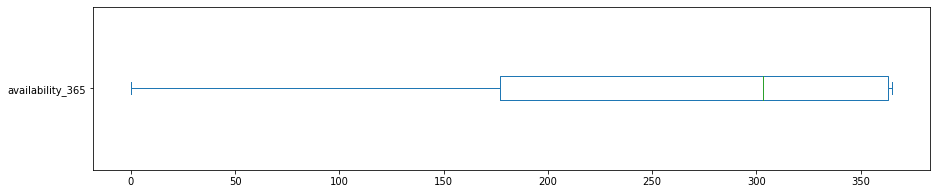

In [ ]:
df.availability_365.plot(kind='box', vert=False, figsize=(15, 3))

print('O número mínimo de dias disponíveis da alocação é %s.' % min(df.availability_365))
print('O número máximo de dias disponíveis da alocação é %s.' % max(df.availability_365))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.availability_365.quantile(0.75), df.availability_365.quantile(0.25), df.availability_365.mean(), df.availability_365.max(), df.availability_365.min()))
print('Não há outlier para dias disponíveis da alocação no ano')
print('\n')

#### Number_of_reviews_ltm

O número mínimo de reviews nos últimos 12 meses é 0.
O número máximo de reviews nos últimos 12 meses é 119.


Cálculo para achar outlier:
Outlier máx
O outlier cai de 631 durante todo o tempo de atividade das alocações para 119 se considerarmos os últimos 12 meses.




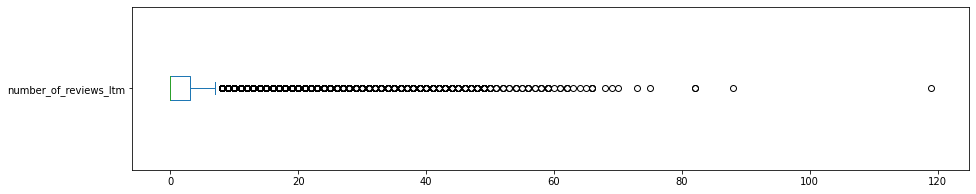

In [ ]:
df.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15, 3))

print('O número mínimo de reviews nos últimos 12 meses é %s.' % min(df.number_of_reviews_ltm))
print('O número máximo de reviews nos últimos 12 meses é %s.' % max(df.number_of_reviews_ltm))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.number_of_reviews_ltm.quantile(0.75), df.number_of_reviews_ltm.quantile(0.25), df.number_of_reviews_ltm.mean(), df.number_of_reviews_ltm.max(), df.number_of_reviews_ltm.min()))
print('O outlier cai de 631 durante todo o tempo de atividade das alocações para 119 se considerarmos os últimos 12 meses.')
print('\n')

## Resultado do tratamento

Agora que identificamos os outliers, vamos removê-los do dataset...



In [ ]:
df_clean = df.copy()
# removendo outliers superiores
df_clean.drop(df_clean[df_clean.price > calc_lim_sup(df.price.quantile(0.75), df.price.quantile(0.25), df.price.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > calc_lim_sup(df.minimum_nights.quantile(0.75), df.minimum_nights.quantile(0.25), df.minimum_nights.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > calc_lim_sup(df.number_of_reviews.quantile(0.75), df.number_of_reviews.quantile(0.25), df.number_of_reviews.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > calc_lim_sup(df.reviews_per_month.quantile(0.75), df.reviews_per_month.quantile(0.25), df.reviews_per_month.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > calc_lim_sup(df.calculated_host_listings_count.quantile(0.75), df.calculated_host_listings_count.quantile(0.25), df.calculated_host_listings_count.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > calc_lim_sup(df.number_of_reviews_ltm.quantile(0.75), df.number_of_reviews_ltm.quantile(0.25), df.number_of_reviews_ltm.mean())].index, axis=0, inplace=True)

# removendo outliers inferiores
df_clean.drop(df_clean[df_clean.price < calc_lim_inf(df.price.quantile(0.75), df.price.quantile(0.25), df.price.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights < calc_lim_inf(df.minimum_nights.quantile(0.75), df.minimum_nights.quantile(0.25), df.minimum_nights.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews < calc_lim_inf(df.number_of_reviews.quantile(0.75), df.number_of_reviews.quantile(0.25), df.number_of_reviews.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month < calc_lim_inf(df.reviews_per_month.quantile(0.75), df.reviews_per_month.quantile(0.25), df.reviews_per_month.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count < calc_lim_inf(df.calculated_host_listings_count.quantile(0.75), df.calculated_host_listings_count.quantile(0.25), df.calculated_host_listings_count.mean())].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm < calc_lim_inf(df.number_of_reviews_ltm.quantile(0.75), df.number_of_reviews_ltm.quantile(0.25), df.number_of_reviews_ltm.mean())].index, axis=0, inplace=True)

Vamos montar a tabela consolidada do início da sessão novamente

In [ ]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6629.000000,6629.000000,6629.000000,4030.000000,6629.000000,6629.000000,6629.000000
mean,89.526324,2.084025,3.731785,0.211548,6.217831,257.407905,0.812038
std,33.897193,1.270350,5.995033,0.203853,2.659330,126.807251,1.461526
min,49.000000,1.000000,0.000000,0.010000,4.000000,0.000000,0.000000
25%,62.000000,1.000000,0.000000,0.060000,4.000000,179.000000,0.000000
50%,80.000000,2.000000,1.000000,0.150000,5.000000,322.000000,0.000000
75%,106.000000,3.000000,5.000000,0.280000,7.000000,363.000000,1.000000
max,198.000000,6.000000,30.000000,1.240000,15.000000,365.000000,7.000000


E finalmente vammos plotar os histogramas da base limpa:

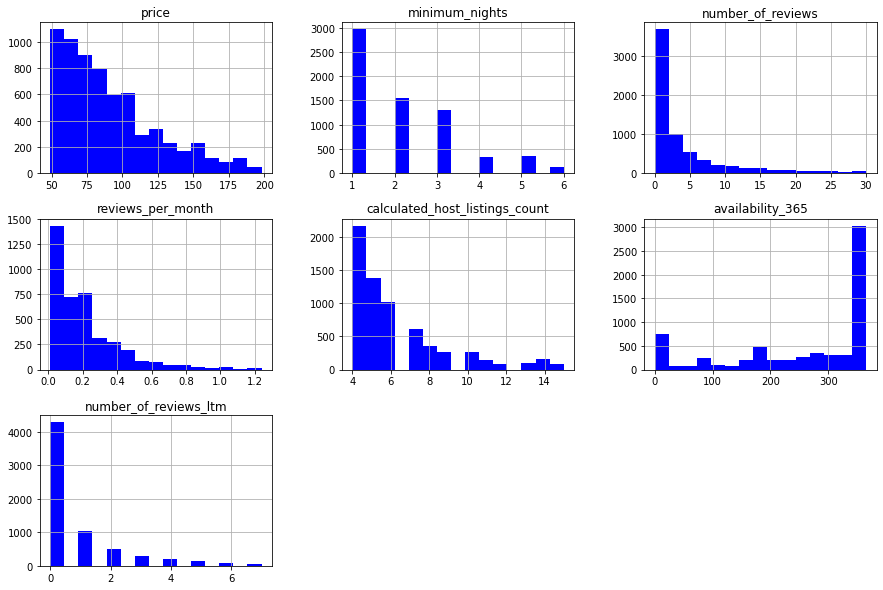

In [ ]:
# plotando a base limpa
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].hist(bins = 15, figsize =(15, 10), color='blue');

Vamos tomar novamente a variável `price` como exemplo. No histograma da variável com a base bruta, só pudemos concluir que a enorme maioria dos preços das diárias estava abaixo dos 1000 euros, conforme o gráfico abaixo:

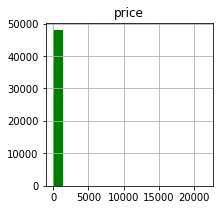

In [ ]:
df[['price']].hist(bins = 15, figsize =(3, 3), color='green');

Agora, na base limpa, visualizamos com mais clareza que a maioria das alocações possui uma diária abaixo dos 100 euros, enquanto as mais caras custam aproximadamente 200 euros.

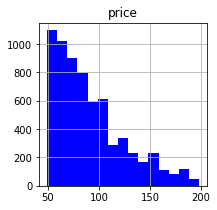

In [ ]:
df_clean[['price']].hist(bins = 15, figsize =(3, 3), color='blue');

# 4) Correlação

Para esse passo, criaremos uma matriz de correlação, que nos mostra se existe uma correlação entre as variáveis e, em caso positivo, qual é a sua magnitude. É um indicador que varia de -1 (muito forte negativamente) a 1 (muito forte positivamente), sendo 0 uma correlação inexistente.

In [ ]:
matrix = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm']].corr()
display(matrix)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
price,1.000000,0.046045,-0.080620,-0.012470,0.102898,-0.059639
minimum_nights,0.046045,1.000000,0.048307,-0.057161,-0.010242,0.035162
number_of_reviews,-0.080620,0.048307,1.000000,0.350126,-0.027555,0.522710
reviews_per_month,-0.012470,-0.057161,0.350126,1.000000,0.034058,0.651516
calculated_host_listings_count,0.102898,-0.010242,-0.027555,0.034058,1.000000,0.009721
number_of_reviews_ltm,-0.059639,0.035162,0.522710,0.651516,0.009721,1.000000


Para auxiliar nossa análise, vamos plotar um mapa de calor para visualizarmos graficamente onde podem existir correlações.

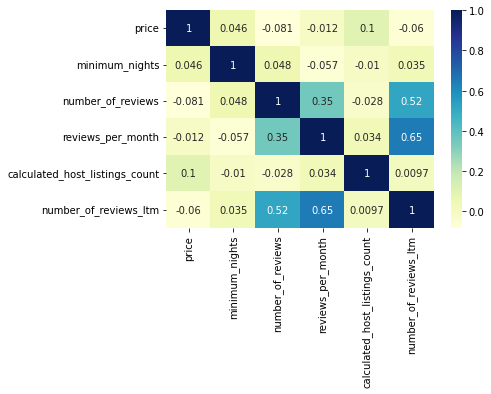

In [ ]:
# plotando o heatmap
sns.heatmap(matrix, cmap="YlGnBu", annot=True);

**Conclusão**: Pelo heatmap, vemos que existe uma correlação mais forte entre revisões por mês (`reviews_per_month`) e número de revisões dos últimos 12 meses (`number_of_reviews_ltm`)

Seria interessante se fosse disponibilizado no dataset uma variável com a média das notas para os imóveis. Dessa forma, analisaríamos se há uma correlação positiva ou negativa do número de avaliações com as notas.

Igualmente interessante seria comparar as notas dos imóveis com os preços das diárias, para verificarmos se os imóveis mais caros entregam de fato uma melhor experiência.

Uma última sugestão de variável é a informação da data de início de alocações no airbnb. Teria potencial de gerar insights sobre quanto tempo os hosts estão na plataforma e a probabilidade da alocação ser velha ou precisar de manutenção. Poderia ter alguma correlação com as notas também.

# 5) Preços dos imóveis

## Qual é a média dos preços de aluguel?

In [ ]:
print('A média de preços de aluguel é {} euros'.format(round(df_clean.price.mean(), 2)))

A média de preços de aluguel é 89.53 euros


## Qual é a média do mínimo de noites para aluguel (minimum_nights)?

In [ ]:
print('A média do mínimo de noites é de {} noites'.format(round(df_clean.minimum_nights.mean(), 2)))

A média do mínimo de noites é de 3.14 noites


## Qual é a localidade mais cara do dataset?



In [ ]:
print('Ranking dos 10 bairros/comunes mais caros da Sicília:\n')
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])

Ranking dos 10 bairros/comunes mais caros da Sicília:

neighbourhood
Buccheri                 150.000000
Gibellina                150.000000
Centuripe                147.500000
Valverde                 143.400000
Montemaggiore Belsito    141.666667
Trabia                   140.500000
Racalmuto                140.000000
Vittoria                 135.333333
Naso                     130.000000
Viagrande                130.000000
Name: price, dtype: float64


Os bairros/comunes mais caros são Buccheri e Gibellina, empatados com 150 euros.

Vamos analisá-los com mais calma.


### Gibellina

Por este [link](https://en.wikipedia.org/wiki/1968_Belice_earthquake) diz que a região sofreu um terremoto em 1968, que reduziu drasticamente a demografia do lugar. Trata-se de um lugar pouco povoado, com menos de 5 mil habitantes.

Vamos investigar quantas alocações há no lugar, para saber se não há uma escassez na amostra.

In [ ]:
print('O número de alocação de Gibelina é:', df_clean[df_clean.neighbourhood == 'Gibellina'].shape[0])
print('\n')
display(df_clean[df_clean.neighbourhood == 'Gibellina'])

O número de alocação de Gibelina é: 1




,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
25093,30153374,Gibellina Arte appartamento,149973279,Pietro,Gibellina,37.81259,12.86831,Entire home/apt,150,1,0,NaN,NaN,4,179,0


### Buccheri

Buccheri é ainda menos povoado que Gibellina, com menos de 2 mil habitantes. Muito provavelmente o volume de alocações oferecidas seja tão baixo quanto Gibellina.

Vamos investigar quantas alocações há no lugar, para saber se não há uma escassez na amostra.

In [ ]:
print('O número de alocação de Buccheri é:', df_clean[df_clean.neighbourhood == 'Buccheri'].shape[0])
print('\n')
display(df_clean[df_clean.neighbourhood == 'Buccheri'])

O número de alocação de Buccheri é: 1




,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
36004,43565744,Casa indipendente con vista sul vulcano a Bucc...,181443651,Mariella,Buccheri,37.12829,14.85211,Entire home/apt,150,3,1,2021-08-10,0.21,4,151,1


Nossa investigação sobre a localidade do dataset não foi muito precisa, pois as comunes com baixo volume de imóveis geram um viés no resultado, comprometendo-o.

# 6) Busca pela estadia ideal

## Qual o tipo de imóvel mais alugado no Airbnb?

In [ ]:
print('Valores absolutos')
print('\n')
print(df_clean.room_type.value_counts())
print('\n')
print('Visão percentual')
print('\n')
print(df_clean.room_type.value_counts() / df_clean.shape[0])
print('\n')
print('O tipo de alocação mais alugada é "Entire home/apt"')

Valores absolutos


Entire home/apt    4075
Private room       2303
Hotel room          247
Shared room           4
Name: room_type, dtype: int64


Visão percentual


Entire home/apt    0.614723
Private room       0.347413
Hotel room         0.037261
Shared room        0.000603
Name: room_type, dtype: float64


O tipo de alocação mais alugada é "Entire home/apt"


Chegou o momento de planejar minha viagem para a Sicília. Sou do tipo de viajante que economiza na hospedagem. Logo, vou me basear pelo preço médio da ilha.

Vimos na sessão anterior que o preço médio da diária é aproximadamente 89 euros. Na tentativas de evitar perrengues, vou escolher o imóvel com o valor mais próximo possível da média de 89 euros. 🤔

Pelo [site](https://descobrindoasicilia.com/) que estou usando como referência, as principais cidades são: Palermo, Catania, Taormina e Siracusa. Minha ideia é passar duas noites em cada uma. Logo, a alocação precisa ter um mínimo de noites de 2 ou 1.

Como a grande maioria das opções são do tipo "Entire home/apt", vou restringir minha busca apenas a esse tipo de alocação 😀

Ao final, ainda vou calcular o preço total para dois dias em cada uma das cidades selecionadas 💸

Vamos lá...

In [ ]:
# setando valores pelas regras que defini acima

# preço
preco_target = df_clean.price.mean()
# cidades
cidades = ['Palermo', 'Catania', 'Taormina', 'Siracusa']
# numero de noites
noites = 2
# tipo de alocação
alocacao = 'Entire home/apt'
# total de gasto com hospedagem
gasto_total = 0

for i in cidades:
  opcao_escolhida = df_clean.loc[(df_clean.price <= preco_target) &
             (df_clean.neighbourhood == i) &
             (df_clean.minimum_nights <= noites) &
             (df_clean.room_type <= alocacao)].sort_values('price', ascending=False)[0:1][['name', 'host_name', 'price', 'neighbourhood']]
  gasto_total += opcao_escolhida.values[0][2]
  print('Cidade: {}'.format(opcao_escolhida.values[0][3]))
  print('Nome do imóvel: {}'.format(opcao_escolhida.values[0][0]))
  print('Host: {}'.format(opcao_escolhida.values[0][1]))
  print('Preço: {}\n'.format(opcao_escolhida.values[0][2]))

print('Gasto total com hospedagem: {} euros'.format(gasto_total))

Cidade: Palermo
Nome do imóvel: Charming apartment with large terrace
Host: Paola
Preço: 88

Cidade: Catania
Nome do imóvel: Dimora nobiliare nel salotto di Catania i Puritani
Host: Giuseppe
Preço: 88

Cidade: Taormina
Nome do imóvel: On The Beach Taormina Dual
Host: Francesco
Preço: 89

Cidade: Siracusa
Nome do imóvel: Siracusa Stefal House
Host: Alessandra & Stefano
Preço: 87

Gasto total com hospedagem: 352 euros


Perfeito, agora  sei quanto devo separar para hospedagem 🙂

Por fim, como são fornecidas as Latitudes e Longitudes para as alocações, eu consigo determinar sua localização geográfica, assim como as faixas de preço em torno da ilha. Usaremos `x=longitude` e `y=latitude`.

A barra do espectro de cores ao lado mostra o intervalo de preço dos imóveis, que varia do roxo (mais barato) ao rubro (mais caro)

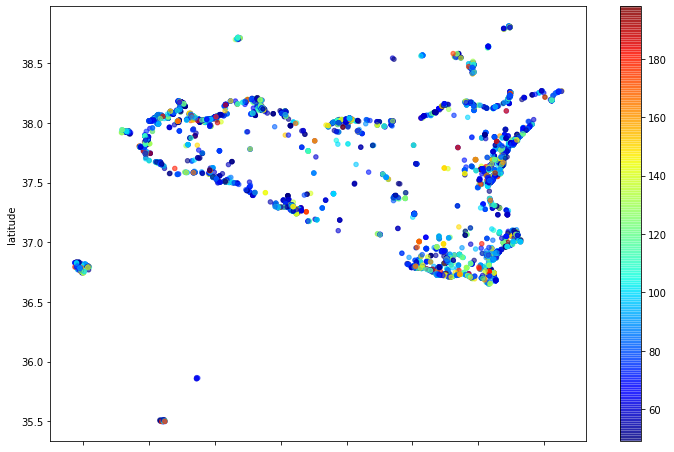

In [ ]:
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.6, c=df_clean['price'], s=20, cmap=plt.get_cmap('jet'), figsize=(12,8))

De fato, olhando no [mapa da ilha](https://www.google.com/maps/d/viewer?mid=1lGy7r4h06IdH1pRGzGjPFocNnwI&ll=37.533270495524114%2C14.413126824351679&z=9), percebemos que as cidades selecionadas possuem uma grande concentração de opções de imóveis em torno. Significa que são boas cidades para eu usar como base para explorar os arredores 🛫

# 7) Conclusões




1.   Havia outliers nos campos `price`,	`minimum_nights`,	`number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count` e `number_of_reviews_ltm`;
2.  Seria interessante que o dataset tivesse a informação da data de início de alocações no airbnb, assim como a média das notas dos imóveis;
3.  Existe uam correlação interessante entre revisões por mês (reviews_per_month) e número de revisões dos últimos 12 meses (number_of_reviews_ltm);
4. Os bairros/comunes mais caro são Gibellina e Buccheri. Porém, essa informação não nos deu muitos insights, pois o volume de imóveis é diminuto em abas, o que torna a análise enviesada.
5. Conseguimos montar um roteiro de 8 noites em 4 das principais cidades da Sicília e calculamos ainda o preço que seria destinado à hospedagem seguindo um conjunto de premissas;
6. Pelo mapa a partir das latitudes e longitudes, podemos ver que há uma maior concentração de alocações no litoral da ilha, sobretudo em cidades maiores como Palermo (possui aeroporto), Catania, Siracusa e Taormina.
